In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import *
from sklearn.metrics import confusion_matrix
from sklearn.metrics import *
from sklearn.model_selection import train_test_split
import importlib.util
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder,LabelEncoder
le = LabelEncoder()
ohe = OneHotEncoder()

import pickle

In [6]:
spec = importlib.util.spec_from_file_location("DataPreprocessing", "/home/admin1/PycharmProjects/Machine_learning_Python/Utility/DataPreprocessing.py")
#At home windows
# spec = importlib.util.spec_from_file_location("DataPreprocessing", "C:/Users/PRAYAS/PycharmProjects/Machine_Learning_Python/Utility/DataPreprocessing.py")
# C:\Users\PRAYAS\PycharmProjects\Machine_Learning_Python\Utility
foo = importlib.util.module_from_spec(spec)
spec.loader.exec_module(foo)
preprocess_obj = foo.DataPreprocessing()


Data PreProcessign object created successfully


In [7]:
dataframe = pd.read_csv('Data/1625Data.txt', header=None, names=['peptide','HIV'])

In [8]:
dataframe.head()

,peptide,HIV
0,SLNLRETN,1
1,AECFRIFD,1
2,HLVEALYL,1
3,TQIMFETF,1
4,AEELAEIF,1


In [9]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1625 entries, 0 to 1624
Data columns (total 2 columns):
peptide    1625 non-null object
HIV        1625 non-null int64
dtypes: int64(1), object(1)
memory usage: 25.5+ KB


In [10]:
(dataframe==np.NaN).sum()

peptide    0
HIV        0
dtype: int64

In [54]:
class converter:
    def convert(self,dataframe):
        amino = dataframe['peptide']
        len_amino = len(amino[0])
        cols = ['Test'+'_'+str(num) for num in range (0,len(amino[0]))]
        # Adding new rows in the
#         for item in cols:
#             dataframe[item]=0
        for items in cols:
            dataframe[items] = np.NaN
        # converting each alphabet to feature
        for row in range(0,dataframe.shape[0]):
            for col in range (0,len_amino):
                dataframe.iloc[row,col+2] = amino[row][col]
        return dataframe
        
    def one_hot_encode(self,dataframe):
        Y_train = dataframe['HIV']
        dataframe= dataframe.drop(columns=['peptide','HIV'],axis=1)
        dataframe = dataframe.apply(le.fit_transform)
        dataframe = dataframe.apply(pd.to_numeric)
        print("Before one hot encoding\n",dataframe.head())
        datas = dataframe
        datas['HIV']=Y_train
        sns.scatterplot(x='Test_0',y='Test_1',hue='HIV',data=datas)
        ohe.fit(dataframe)
        X_train = ohe.transform(dataframe)
#         X_train = X_train[:,8:]
        print("After encoding the shape of X train data is",X_train.shape)
        return X_train,Y_train

In [55]:
converter_obj = converter()
dataframe = converter_obj.convert(dataframe)

In [56]:
dataframe.head()

,peptide,HIV,Test_0,Test_1,Test_2,Test_3,Test_4,Test_5,Test_6,Test_7
0,SLNLRETN,1,S,L,N,L,R,E,T,N
1,AECFRIFD,1,A,E,C,F,R,I,F,D
2,HLVEALYL,1,H,L,V,E,A,L,Y,L
3,TQIMFETF,1,T,Q,I,M,F,E,T,F
4,AEELAEIF,1,A,E,E,L,A,E,I,F


In [57]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1625 entries, 0 to 1624
Data columns (total 10 columns):
peptide    1625 non-null object
HIV        1625 non-null int64
Test_0     1625 non-null object
Test_1     1625 non-null object
Test_2     1625 non-null object
Test_3     1625 non-null object
Test_4     1625 non-null object
Test_5     1625 non-null object
Test_6     1625 non-null object
Test_7     1625 non-null object
dtypes: int64(1), object(9)
memory usage: 127.0+ KB


In [58]:
class Naive_Bayes_sklearn():
        
    def Naive_Bayes_sklearn_demo(self,X_train,Y_train,X_test,Y_test):
        classifier = GaussianNB()
        classifier.fit(X_train.toarray(),Y_train)
        Ypred = classifier.predict(X_test.toarray())
        file = open('NaiveBayes_P2.pkl','wb')
        pickle.dump(classifier,file)
        file.close()
        print("Accuracy = ",accuracy_score(Ypred,Y_test)*100)
     
    def main(self,dataframe):
        converter_obj = converter()
        X_train,Y_train = converter_obj.one_hot_encode(dataframe)
        X_train,X_test,Y_train,Y_test = train_test_split(X_train,Y_train,test_size = 0.3)
        self.Naive_Bayes_sklearn_demo(X_train,Y_train,X_test,Y_test)

In [59]:
classifier  = Naive_Bayes_sklearn()

Before one hot encoding
    Test_0  Test_1  Test_2  Test_3  Test_4  Test_5  Test_6  Test_7
0      15       9      11       9      14       3      16      11
1       0       3       1       4      14       7       4       2
2       6       9      17       3       0       9      19       9
3      16      13       7      10       4       3      16       4
4       0       3       3       9       0       3       7       4


ValueError: X needs to contain only non-negative integers.

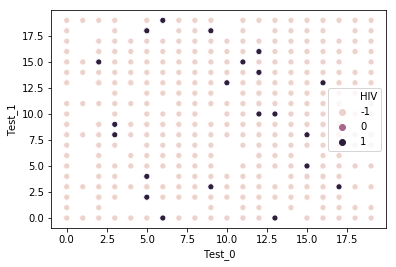

In [60]:
classifier.main(dataframe)